In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
import pandas as pd
import pandas_datareader as web
import yfinance as yf

In [5]:
yf.pdr_override()

In [28]:
# Get data for the specified period and stocks
start = pd.to_datetime('2016-01-01')
end = pd.to_datetime('2017-01-01')
asset = web.data.get_data_yahoo('AAPL', start=start, end=end)
benchmark = web.data.get_data_yahoo('SPY', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
benchmark = benchmark['Adj Close']
asset = asset['Adj Close']

In [30]:
asset_ret = asset.pct_change()[1:]
bench_ret = benchmark.pct_change()[1:]

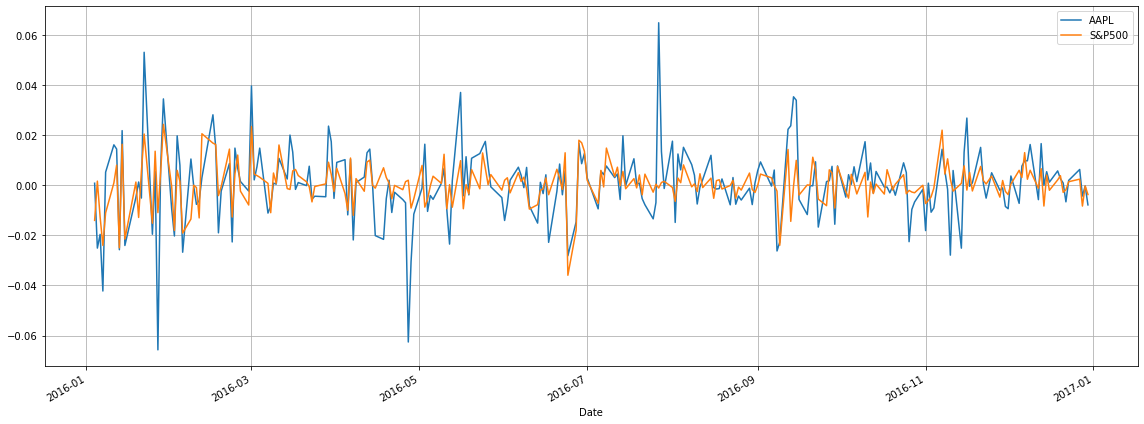

In [33]:
asset_ret.plot(label = 'AAPL', figsize = (16,6))
bench_ret.plot(label = 'S&P500', grid=1)
plt.legend()
plt.tight_layout()

Text(0, 0.5, 'AAPL Ret')

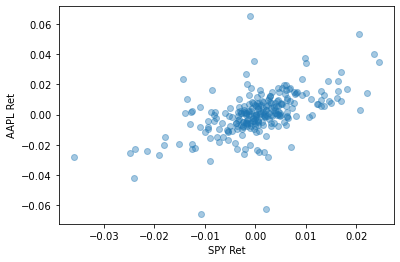

In [39]:
plt.scatter(bench_ret,asset_ret,alpha=0.4)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [40]:
AAPL = asset_ret.values
spy = bench_ret.values

In [43]:
# Add a constant (column of 1s for intercept)
spy_constant = sm.add_constant(spy)

# Fit regression to data
model = regression.linear_model.OLS(AAPL,spy_constant).fit()

In [44]:
alpha , beta = model.params

In [45]:
alpha

8.596889788919378e-05

In [46]:
beta

1.0107047802881812

Text(0, 0.5, 'AAPL Ret')

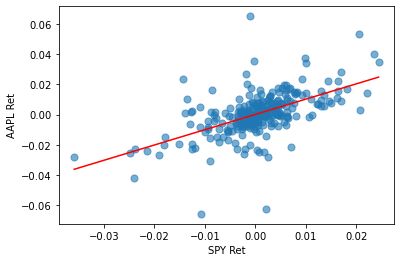

In [49]:
# Scatter Returns
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)

# Fit Line
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line * beta + alpha

plt.plot(spy_line,y,'r')

plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [50]:
hedged = -1*beta*bench_ret + asset_ret

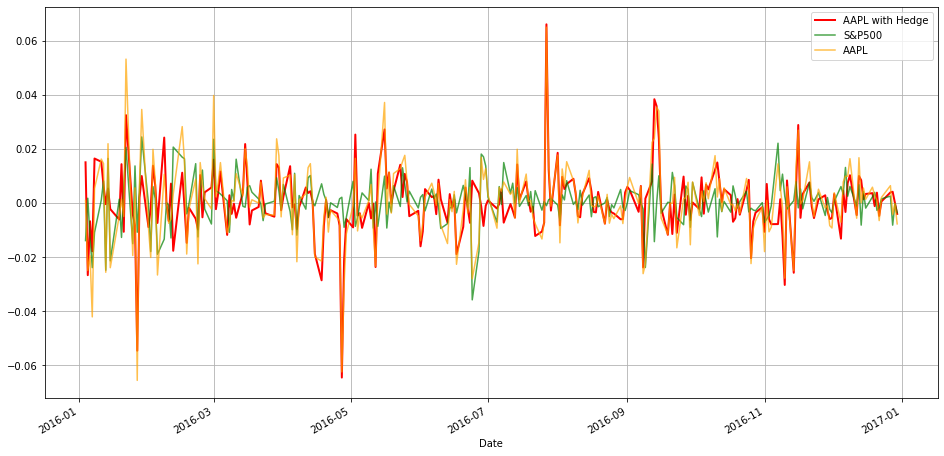

In [65]:
hedged.plot(label='AAPL with Hedge', figsize = (16,8), lw=2, c='r')
bench_ret.plot(alpha=0.7, label = 'S&P500', c='g')
asset_ret.plot(alpha=0.7, grid=1, label = 'AAPL',c='orange')
plt.legend()

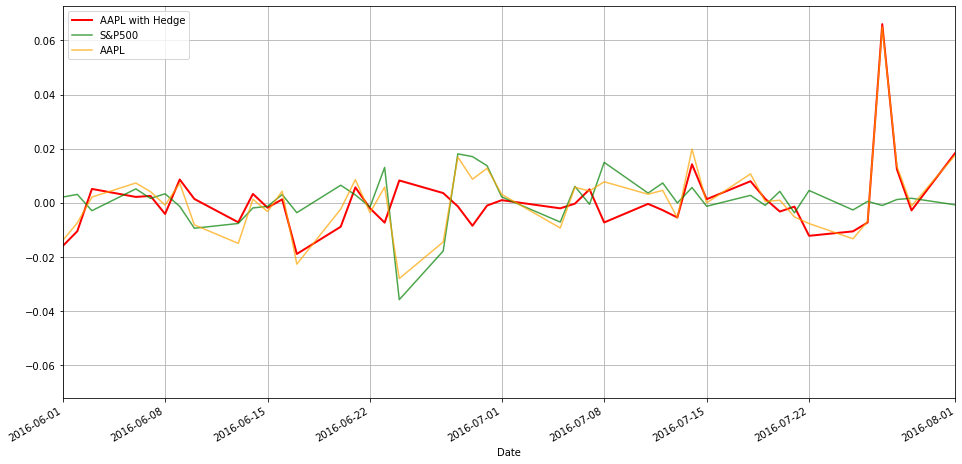

In [66]:
hedged.plot(label='AAPL with Hedge', figsize = (16,8), lw=2, c='r')
bench_ret.plot(alpha=0.7, label = 'S&P500', c='g')
asset_ret.plot(alpha=0.7, grid=1, label = 'AAPL',c='orange')
plt.xlim(['2016-06-01','2016-08-01'])
plt.legend()